# Greetings 

In this project I will be using the following libraries:

- Pandas
- Seaborn
- Plotly.express

&nbsp;

In this project I will be making analysis on a dataset of Students Performance, this project does not have a specific objective so I will just define them:

## 🎯 Objectives

- Find the top 10 performances among the all students
- Encounter the number of students that gotten 100 points in each test
- Discover in which conditions are the students that got a score of 80 or higher

&nbsp;

These are the objectives I traced when first seeing the dataset, it only have 8 columns, well let's start with the first objective

## ==================================================

# 🏆 Find the top 10 performances among the all students

So all there is to do in this one is finding out the students that performed really well in the tests

But before anything, let's read the file


In [14]:
import pandas as pd

table = pd.read_csv("StudentsPerformance.csv")

table.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


## ==================================================
A basic dataset for registering the scores, but we can already see that it was not directly gotten from the educational institution since:

- it does not have the students name
- it does not have the realization date of the tests

There could be Schools that do not put this type of information on their base, however it has columns for "parental level of education", "lunch" and "test preparation course" in it<br>
What I am trying to get is that this dataset was made to recieve processes of **Data Analysis**, and the first thing to do with this type of dataset is exploring it for finding errors or NaN values

In [15]:
table.info()

print("\n")

table.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB




,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## ==================================================
Seems like there is nothing wrong with it despite all, it is still important to check every dataset to do not run into errors with apparently no reason

Well, now let's resume the objective, if I want to find the students with the best performance I will just focus on the average of the three tests, but it does not have a column for that... <br>
So we will have to make one

In [16]:
table["score average"] = table["math score"] + table["reading score"] + table["writing score"] / 3

table

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group B,bachelor's degree,standard,none,72,72,74,168.666667
1,female,group C,some college,standard,completed,69,90,88,188.333333
2,female,group B,master's degree,standard,none,90,95,93,216.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,118.666667
4,male,group C,some college,standard,none,76,78,75,179.000000
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,218.666667
996,male,group C,high school,free/reduced,none,62,55,55,135.333333
997,female,group C,high school,free/reduced,completed,59,71,65,151.666667
998,female,group D,some college,standard,completed,68,78,77,171.666667


## ==================================================
Now I will make use of three methods, `loc`, `sort_values` and `head`

- `.loc()` can filter the dataset by a condition, in this case I will filter the rows that are equal or lower the highest Average Score
- `.sort_values()` can sort the dataset by a certain column, in this case I will sort it by the Average Score and make it descending
- `.head()` can be used to visualize the top of the dataset, in this case I specified to see the first 10 lines

All that combined will make us solve the first objective

In [17]:
table.loc[table["score average"] <= max(table["score average"])].sort_values(by="score average", ascending=False).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
916,male,group E,bachelor's degree,standard,completed,100,100,100,233.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,233.333333
962,female,group E,associate's degree,standard,none,100,100,100,233.333333
114,female,group E,bachelor's degree,standard,completed,99,100,100,232.333333
149,male,group E,associate's degree,free/reduced,completed,100,100,93,231.000000
712,female,group D,some college,standard,none,98,100,99,231.000000
179,female,group D,some high school,standard,completed,97,100,100,230.333333
625,male,group D,some college,standard,completed,100,97,99,230.000000
165,female,group C,bachelor's degree,standard,completed,96,100,100,229.333333
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,226.333333


# 💯 Encounter the number of students that gotten 100 points in each test

Here we will count how many students actually got 100 point in a test and in which test

Dispite being simple, this is only one of the many things that pandas can do 

In [18]:
print(f"""=== 100 Points ===

Math Score: {table.loc[table["math score"] == 100].count()[0]}

Reading Score: {table.loc[table["reading score"] == 100].count()[0]}

Writing Score: {table.loc[table["writing score"] == 100].count()[0]}
""")

=== 100 Points ===

Math Score: 7

Reading Score: 17

Writing Score: 14



# 📈 Discover in which conditions are the students that got a score of 80 or higher

This one is a bit more complex, it is basically asking "what makes the students go actually well?" <br>
Let's start with a heatmap, a heatmap is based on correlation for example: 

You should usually wake in the morning

Maybe it is a over oversimplified example but the more you sleep at night the more usaully you wake up in the morning <br>
Sleeping in the night has a high correlation with waking up in the morning, this type of correlation is all about heatmap, but the is one detail:

A high correlation is based on a number near "1", the more close a number is to "1" then the more correlated the two topics will be

Maybe this is a bit complicated, so for this graph focus that the more "blue", the more correlated are the topics and the more "red", less correlated they are

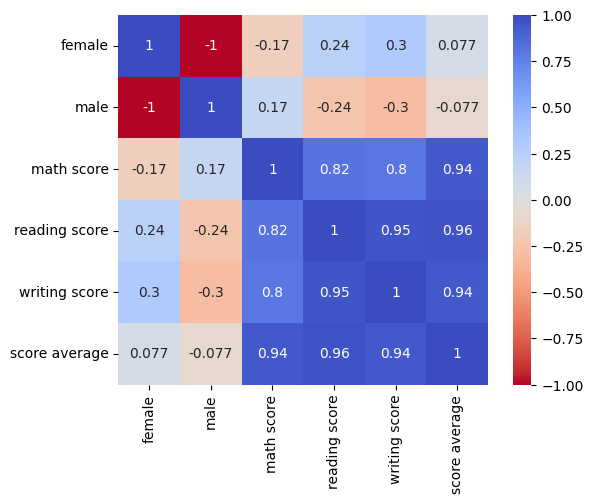

In [19]:
import seaborn as sb

table["female"] = table["gender"] == "female"
table["male"] = table["gender"] == "male"

table_gen = table[["female", "male", "math score", "reading score", "writing score", "score average"]]

sb.heatmap(table_gen.corr(), cmap="coolwarm_r", annot=True, square=True);

## ==================================================
From this graph we can just see that the fact of being female actually have some correlation with the tests <br>
With exception of the math test the male actually do not performed so well as the female

It is ok to do a heatmap just to see the performance between the genders, but it can be a bit hard to see when analyzing the correlation by race so... we will proceed with histograms <br>
Let's just dump what become junk

In [20]:
del table_gen

table = table.drop(columns=["female", "male", "score average"], axis=1)

table.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


## ==================================================
So in this histogram we can see the **count** in Y-axis which is about how many people are included, the **scores** in the X-axis, and by **colors** we can see what they represent in the chart legend
It is easy to see the conditions by just observing the graphs, the first ones are...

## 👫Gender X Scores

So, these already give interesting insights:

> Men dominate the highest grades only on the math test
> - Maybe women did not focus on math
> - Maybe men did focus only on math

&nbsp;

> The graphs of woman dominance have a strange gap in the score 98-99
> - Was the teacher was kindly to those who almost hit 100?

&nbsp;

> Only few got a score between 0 and 20
> - Perhaps this institution just taught their students really well

&nbsp;

Well it is already certain that woman dominated over the tests

In [21]:
import plotly.express as px

for coluna in table[["gender", "math score", "reading score", "writing score"]]:
    if coluna != "gender":
        fig = px.histogram(table[["gender", "math score", "reading score", "writing score"]], x=coluna, color="gender")
        fig.show()

## 👩‍❤️‍👨Parental Level of Education X Scores

The level of education of the parents actually have effects in the scores of their children <br>
It is easy to understand that the more educated the parents the more well they can educate and guide their children

Well my insights are:

> The children of those who actually have parents with master's degree are few and do not actually roam around 90 and above scores
> - Maybe their parents do not have much time with them and could not accompany their children education closely for probably occupying high office?
> - Maybe they are few because they would ocupate more private schools as their parents are likeable to have the money?, I am treating this institution as a regular and the reason for this is the lunch charts, we will get to it
> - Maybe those who actually have master's degree just does not have the time to take care of a possible son or daugther and just do not have kids? That is a bit extreme but it is just a guess

&nbsp;

> The children of those who actually have parents with bachelor's degree have 100 scores more than the others in the writing and reading tests
> - They really had the time to educate and teach their children, perhaps they did not wanted to take the master's degree to actually focus on having children?

&nbsp;

> The children of those who actually have parents with some college a roam a bit more around the scores of 90 and above
> - They also had the time to educate and teach their children, but I did not actually expected this outcome

&nbsp;

Well, parents with some college or bachelor's degree can draw out their kids potential rigth to them

In [22]:
for coluna in table[["parental level of education", "math score", "reading score", "writing score"]]:
    if coluna != "parental level of education":
        fig = px.histogram(table[["parental level of education", "math score", "reading score", "writing score"]], x=coluna, color="parental level of education")
        fig.show()

## 👥 Race/Ethnicity X Scores

Well there is not much to see or figure out over counting since the values of this column are just groups from A to E

> Groups C and D are the groups that have more students in a notable way

&nbsp;

> Groups A and E are the groups that have less students in a notable way, but group E actualy dominates more the 100 scores

&nbsp;

Those who are not from groups A and B have more chances to have a score over 80

In [23]:
table_sort = table.sort_values(by="race/ethnicity")

for coluna in table_sort[["race/ethnicity", "math score", "reading score", "writing score"]]:
    if coluna != "race/ethnicity":
        fig = px.histogram(table_sort[["race/ethnicity", "math score", "reading score", "writing score"]], x=coluna, color="race/ethnicity")
        fig.show()

## 🍔 Lunch X Scores

The form of how we eat actually affects our performance, as we see:

> Those who have a standard lunch are those who can reach the top

&nbsp;

Geting back from the Parental Level topic, even though being minority, I still think there should be fewer students that have a free/reduced lunch, of course I could be wrong though <br>
Nothing more to add, make sure you eat well

In [24]:
for coluna in table[["lunch", "math score", "reading score", "writing score"]]:
    if coluna != "lunch":
        fig = px.histogram(table[["lunch", "math score", "reading score", "writing score"]], x=coluna, color="lunch")
        fig.show()

## 📑 Test Preparation Course X Scores

Even being the minority:

> Those who completed the a test preparation course scored highter

&nbsp;

> Even though those who did not take the course still scored above 80

&nbsp;

The ones that have taken the course did not scored so low, but having the course does not pass me the influence to be a primary factor to get a score above 80

In [25]:
for coluna in table[["test preparation course", "math score", "reading score", "writing score"]]:
    if coluna != "test preparation course":
        fig = px.histogram(table[["test preparation course", "math score", "reading score", "writing score"]], x=coluna, color="test preparation course")
        fig.show()

## ✨ Conclusion

### The conditions of those who got scores above 80 are primarily:

&nbsp;

- Being **Woman**
- Having parents with **some college** or **bachelor's degree**
- Being from the **groups C, D and E**
- Having a **Standart** Lunch

&nbsp;

And... this is all, thank you for seeing my analysis! Until the next project!